# Documentation Examples

## Microscope API

In [ ]:
# connecting to the microscope
from fibsem import utils

# connect, setup session use default configuration
microscope, settings = utils.setup_session()

In [ ]:
# apply current configuration
microscope.apply_configuration()

In [ ]:
from fibsem.structures import BeamType

# pump the system
microscope.pump()

# turn on electron beam
microscope.turn_on(BeamType.ELECTRON)

# turn on ion beam 
microscope.turn_on(BeamType.ION)

# home the stage
microscope.home()

In [ ]:
# check if electron beam is on
electron_on = microscope.get("on", BeamType.ELECTRON)
print(f"Electron Beam: {electron_on}")


# check chamber state
chamber_state = microscope.get("chamber_state")
print(f"Chamber State: {chamber_state}")

# get column tilt of ion
ion_column_tilt = microscope.get("column_tilt", BeamType.ION)
print(f"Ion Column Tilt: {ion_column_tilt}")

## Imaging API


In [5]:
# connecting to the microscope
from fibsem import utils, acquire
from fibsem.structures import BeamType
import matplotlib.pyplot as plt


# connect, setup session use default configuration
microscope, settings = utils.setup_session()

2024-01-21 18:17:45,598 — root — INFO — connect_to_microscope:5103 — Microscope client connected to DemoMicroscope with serial number 123456 and software version ('0.1',)
2024-01-21 18:17:45,599 — root — INFO — setup_session:214 — Finished setup for session: demo_2024-01-21-06-17-45PM


In [6]:
# print the image settings
print(settings.image)


# change image settings
settings.image.dwell_time = 2e-6  # set the dwell time to 2us
settings.image.save = True        # automatically save the image (note: this overwrite existing data, check the filename!!)


ImageSettings(resolution=[1536, 1024], dwell_time=1e-06, hfw=0.00015, autocontrast=True, beam_type=<BeamType.ELECTRON: 1>, save=False, filename='default_image', autogamma=False, path='/home/patrick/github/fibsem/fibsem/log', reduced_area=None, line_integration=None, scan_interlacing=None, frame_integration=None, drift_correction=False)


2024-01-21 18:17:47,021 — root — INFO — acquire_image:5120 — acquiring new ELECTRON image.
2024-01-21 18:17:47,026 — root — INFO — acquire_image:5120 — acquiring new ION image.


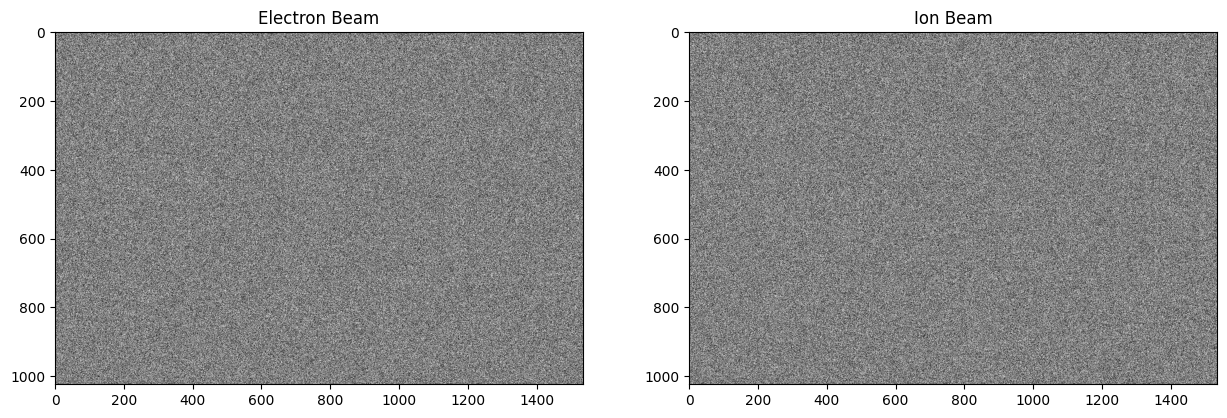

In [7]:
from fibsem import acquire
import matplotlib.pyplot as plt

# acquire image
eb_image = acquire.acquire_image(microscope, settings.image)

# change settings, reacquire
settings.image.hfw = 400e-6             # set the hfov to 400um
settings.image.beam_type = BeamType.ION # set the imaging to ion beam
ib_image = acquire.acquire_image(microscope, settings.image)

# plot
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].imshow(eb_image.data, cmap="gray")
ax[0].set_title("Electron Beam")
ax[1].imshow(ib_image.data, cmap="gray")
ax[1].set_title("Ion Beam")
plt.show()

In [8]:
## Image Metadata
from pprint import pprint

# get the image settings used
image_settings = eb_image.metadata.image_settings
print(f"Image Settings: {image_settings}")

# access the stage position
stage_position = eb_image.metadata.microscope_state.stage_position
print(f"Stage Position: {stage_position}")

# get the electron detector used for imaging
detector = eb_image.metadata.microscope_state.electron_detector
print(f"Electron Detector: {detector}")

# pretty print the metadata (note: this is a lot of data)
pprint(eb_image.metadata.to_dict())

Image Settings: ImageSettings(resolution=[1536, 1024], dwell_time=2e-06, hfw=0.0004, autocontrast=True, beam_type=<BeamType.ION: 2>, save=True, filename='default_image', autogamma=False, path='/home/patrick/github/fibsem/fibsem/log', reduced_area=None, line_integration=None, scan_interlacing=None, frame_integration=None, drift_correction=False)
Stage Position: FibsemStagePosition(name=None, x=0, y=0, z=0, r=0, t=0, coordinate_system='RAW')
Electron Detector: FibsemDetectorSettings(type='ETD', mode='SecondaryElectrons', brightness=0.5, contrast=0.5)
{'experiment': {'application': 'OpenFIBSEM',
                'application_version': None,
                'date': 1705821439.285987,
                'fibsem_version': '0.3.2a0',
                'id': None,
                'method': None},
 'image': {'autocontrast': True,
           'autogamma': False,
           'beam_type': 'ION',
           'drift_correction': False,
           'dwell_time': 2e-06,
           'filename': 'default_image',
 

metadata: FibsemImageMetadata(image_settings=ImageSettings(resolution=[1536, 1024], dwell_time=2e-06, hfw=0.0004, autocontrast=True, beam_type=<BeamType.ION: 2>, save=True, filename='default_image', autogamma=False, path='/home/patrick/github/fibsem/fibsem/log', reduced_area=None, line_integration=None, scan_interlacing=None, frame_integration=None, drift_correction=False), pixel_size=Point(x=9.765624999999999e-08, y=9.765624999999999e-08, name=None), microscope_state=MicroscopeState(timestamp=1705821467.024908, stage_position=FibsemStagePosition(name=None, x=0.0, y=0.0, z=0.0, r=0.0, t=0.0, coordinate_system='RAW'), electron_beam=BeamSettings(beam_type=<BeamType.ELECTRON: 1>, working_distance=0.004, beam_current=1e-12, voltage=2000, hfw=0.00015, resolution=[1536, 1024], dwell_time=1e-06, stigmation=Point(x=0.0, y=0.0, name=None), shift=Point(x=0.0, y=0.0, name=None), scan_rotation=0), ion_beam=BeamSettings(beam_type=<BeamType.ION: 2>, working_distance=0.0165, beam_current=2e-11, volta

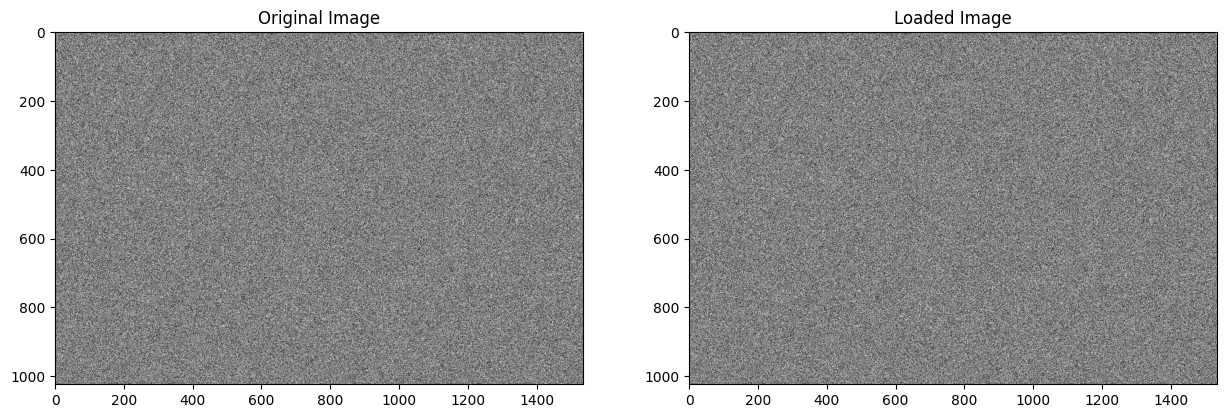

In [9]:
from fibsem.structures import FibsemImage

# save the image
path = "data/test_electron_image.tif"
eb_image.save(path)

# load the image
loaded_image = FibsemImage.load(path)
print(f"metadata: {loaded_image.metadata}")

# plot both
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].imshow(eb_image.data, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(loaded_image.data, cmap="gray")
ax[1].set_title("Loaded Image")
plt.show()


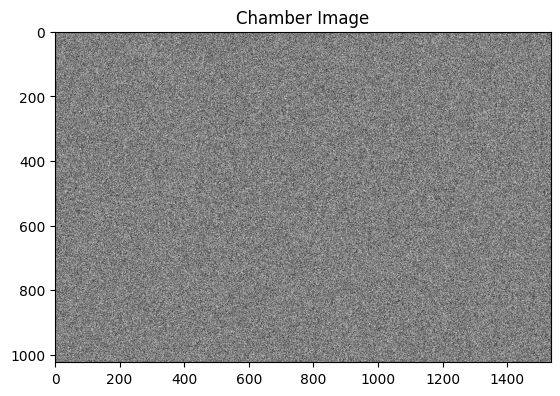

In [11]:
# acquire chamber image
image = microscope.acquire_chamber_image()

plt.imshow(image.data, cmap="gray")
plt.title("Chamber Image")
plt.show()

## Stage Movement API


In [17]:
# connecting to the microscope
from fibsem import utils, acquire
from fibsem.structures import BeamType, FibsemStagePosition
import matplotlib.pyplot as plt


# connect, setup session use default configuration
microscope, settings = utils.setup_session()

2024-01-21 18:58:43,346 — root — INFO — connect_to_microscope:5103 — Microscope client connected to DemoMicroscope with serial number 123456 and software version ('0.1',)
2024-01-21 18:58:43,346 — root — INFO — setup_session:214 — Finished setup for session: demo_2024-01-21-06-58-43PM


In [18]:
# get stage position
stage_position = microscope.get_stage_position()
stage_position.name = "my-position-01"

# go to stage position
microscope.safe_absolute_stage_movement(stage_position)

# save stage position (saves to fibsem/config/positions.yaml by default, can be specified)
utils.save_positions(stage_position)



In [19]:
# NOTE: this will move from the current position, and only change rotation and tilt. It is recommended you move under the beam before hand.

# move flat to the electron
microscope.move_flat_to_beam(BeamType.ELECTRON)

# move flat to the ion
microscope.move_flat_to_beam(BeamType.ION)

2024-01-21 18:58:45,558 — root — INFO — move_flat_to_beam:193 — moving flat to ELECTRON
2024-01-21 18:58:45,561 — root — INFO — move_flat_to_beam:193 — moving flat to ION


In [20]:
# store microscope state
state = microscope.get_microscope_state()

# restore microscope state
microscope.set_microscope_state(state)


In [21]:

# get the initial position
start_position = microscope.get_stage_position()

# relative move (dx=20e-6, y=20e-6)
stage_position = FibsemStagePosition(x=20e-6, y=20e-6)
microscope.move_stage_relative(stage_position)

# absolute move
microscope.safe_absolute_stage_movement(stage_position)


In [24]:
# NOTE: it recommended that you make the beams coincident before this to see the effect
# move flat to electron
microscope.move_flat_to_beam(BeamType.ELECTRON)

# stable move
microscope.stable_move(dx=20e-6, dy=20e-6, beam_type=BeamType.ELECTRON)


2024-01-21 19:03:07,875 — root — INFO — move_flat_to_beam:193 — moving flat to ELECTRON


FibsemStagePosition(name=None, x=2e-05, y=1.6383040885779837e-05, z=-1.1471528727020922e-05, r=0, t=0, coordinate_system='RAW')

In [22]:
# vertical move
microscope.vertical_move(dx=0, dy=10e-6)


FibsemStagePosition(name=None, x=0, y=0, z=1.142116393565321e-05, r=3.141592653589793, t=0.29670597283903605, coordinate_system='RAW')

## Milling API

## Manipulator API


In [ ]:
# insert manipulator

from fibsem import utils, acquire
from fibsem.structures import BeamType
from matplotlib import pyplot as plt

# NOTE: recommend that you move your stage flat + down before running this script

# conect to microscope
microscope, settings = utils.setup_session()

# insert manipulator
microscope.insert_manipulator(name="PARK")

# take reference images
settings.image.hfw = 400e-6
eb_image, ib_image = acquire.take_reference_images(microscope, settings.image)

# plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(eb_image.data, cmap="gray")
ax[1].imshow(ib_image.data, cmap="gray")
plt.show()


In [ ]:
# retract manipulator
microscope.retract_manipulator()

# take reference images
settings.image.hfw = 400e-6
eb_image, ib_image = acquire.take_reference_images(microscope, settings.image)

# plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(eb_image.data, cmap="gray")
ax[1].imshow(ib_image.data, cmap="gray")
plt.show()

In [ ]:
# corrected manipulator movements

# insert manipulator
microscope.insert_manipulator(name="PARK")

# take reference images
settings.image.hfw = 400e-6
eb_image, ib_image = acquire.take_reference_images(microscope, settings.image)

# plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle(f"Manipulator Inserted")
ax[0].imshow(eb_image.data, cmap="gray")
ax[1].imshow(ib_image.data, cmap="gray")
plt.show()

# move manipulator down (ION)
microscope.move_manipulator_corrected(dx=0, dy=-20e-6, beam_type=BeamType.ION)

# take reference images
settings.image.hfw = 400e-6
eb_image, ib_image = acquire.take_reference_images(microscope, settings.image)

# plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle(f"Manipulator Moved (ION)")
ax[0].imshow(eb_image.data, cmap="gray")
ax[1].imshow(ib_image.data, cmap="gray")
plt.show()

# move manipulator in x, y (ELECTRON)
microscope.move_manipulator_corrected(dx=10e-6, dy=-10e-6, beam_type=BeamType.ION)

# take reference images
settings.image.hfw = 400e-6
eb_image, ib_image = acquire.take_reference_images(microscope, settings.image)

# plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle(f"Manipulator Moved (ELECTRON)")
ax[0].imshow(eb_image.data, cmap="gray")
ax[1].imshow(ib_image.data, cmap="gray")
plt.show()

In [ ]:

# move to offset position
from fibsem.structures import FibsemManipulatorPosition

# set position offset
position_offset = FibsemManipulatorPosition(z=10e-6, coordinate_system="RAW")

# move manipulator to offset position (z=10e-6 above EUCENTRIC)
microscope.move_manipulator_to_position_offset(position_offset, name="EUCENTRIC")

# take reference images
settings.image.hfw = 150e-6
eb_image, ib_image = acquire.take_reference_images(microscope, settings.image)

# plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle(f"Manipulator Moved To Offset")
ax[0].imshow(eb_image.data, cmap="gray")
ax[1].imshow(ib_image.data, cmap="gray")
plt.show()

## GIS - Cryo Deposition

In [ ]:
from fibsem import gis, utils

# connect to microscope
microscope, settings = utils.setup_session()

# save current position (optional)
position = microscope.get_stage_position()
position.name = "cryo-deposition-grid-01"
utils.save_positions([position])

# example cryo deposition protocol
gis_protocol = {
    "application_file": "cryo_Pt_dep",          # gis application file
    "gas": "Pt cryo",                           # gis gas
    "position": "cryo",                         # gis position 
    "hfw": 3.0e-05 ,                            # image field width
    "length": 7.0e-06,                          # pattern length
    "beam_current": 1.0e-8,                     # beam current
    "time": 30.0,                               # deposition time
}

# run cryo deposition
gis.cryo_deposition(microscope, 
                    protocol=gis_protocol, 
                    name="cryo-deposition-grid-01")     # specifying name is optional
                                                        # if not specified, current position is used


## Segmentation (Machine Learning)

In [ ]:
%load_ext autoreload
%autoreload 2

from fibsem.segmentation.model import load_model
from fibsem.segmentation.utils import plot_segmentations
from fibsem.structures import FibsemImage


# load model
model = load_model("autolamella-mega-20240107.pt")

# load image (or acquire from microscope)
image = FibsemImage.load("data/test_image.tif")

# model inference (rgb = True to auto convert to rgb)
mask = model.inference(image.data, rgb=False)
mask = mask[0]

# plot segmentation
fig = plot_segmentations(image.data, mask, alpha=0.5)


In [ ]:
%load_ext autoreload
%autoreload 2

from fibsem.segmentation.model import load_model
from fibsem.structures import FibsemImage
from fibsem.segmentation.utils import plot_segmentations
import glob

# load model
model = load_model("autolamella-serial-liftout-20240107.pt")

# load data
filenames = sorted(glob.glob("data/example/0*.tif"))

masks = []
images = []

for fname in filenames:
    image = FibsemImage.load(fname)

    mask = model.inference(image.data, rgb=False)
    mask = mask[0]

    masks.append(mask)
    images.append(image)

fig = plot_segmentations(images, masks, alpha=0.5)


## Feature Detection

In [ ]:
### Example: Multiple Feature Detection

%load_ext autoreload
%autoreload 2

from fibsem.detection import detection
from fibsem.segmentation.model import load_model
from fibsem.structures import FibsemImage
from fibsem.detection.detection import DetectedFeatures, NeedleTip, LamellaRightEdge

# load model
model = load_model("autolamella-mega-20240107.pt")

# load image (or acquire from microscope)
image = FibsemImage.load("data/test_image.tif")

features= [NeedleTip(), LamellaRightEdge()]

# detect features (also runs segmentation inference)
det: DetectedFeatures = detection.detect_features(
    image= image, 
    model= model, 
    features = features,
    pixelsize = 25e-9,      # note: this should be from image.metadata.pixelsize typically
    filter=True, 
    point= None
)

# plot detections
fig = detection.plot_detection(det)


In [ ]:
### Example: Multiple Feature Detection
%load_ext autoreload
%autoreload 2

from fibsem.detection import detection
from fibsem.segmentation.model import load_model
from fibsem.structures import FibsemImage
from fibsem.detection.detection import DetectedFeatures, NeedleTip, LamellaRightEdge
import glob

# load model
model = load_model("autolamella-mega-20240107.pt")

# load data
filenames = glob.glob("data/example/ml*.tif")
features = [detection.LamellaCentre()]

dets = []
for fname in filenames:

    image = FibsemImage.load(fname)

    # detect features (also runs segmentation inference)
    det: DetectedFeatures = detection.detect_features(
        image= image, 
        model= model, 
        features = features,
        pixelsize = image.metadata.pixel_size,
        filter=False, 
        point= None
    )

    dets.append(det)

# plot detections
detection.plot_detections(dets)

In [ ]:
%load_ext autoreload
%autoreload 2

from fibsem.detection import detection
from fibsem.segmentation.model import load_model
from fibsem.structures import FibsemImage
from fibsem.detection.detection import DetectedFeatures, NeedleTip, LamellaRightEdge
import glob

# load model
model = load_model("autolamella-serial-liftout-20240107.pt")

# load data
filenames = sorted(glob.glob("data/example/0*.tif"))
features_list = [
    [detection.CopperAdapterBottomEdge(), detection.VolumeBlockCentre() ],
    [detection.VolumeBlockBottomEdge(), detection.LandingGridCentre()],
    [detection.VolumeBlockBottomEdge(), detection.LamellaTopEdge()],
    [detection.VolumeBlockBottomEdge(), detection.LamellaCentre(), detection.NeedleTipBottom(), detection.CopperAdapterBottomEdge()]

]   

dets = []
for fname, features in zip(filenames, features_list):

    image = FibsemImage.load(fname)

    # detect features (also runs segmentation inference)
    det: DetectedFeatures = detection.detect_features(
        image= image, 
        model= model, 
        features = features,
        filter= False,
    )

    dets.append(det)

# plot detections
detection.plot_detections(dets)

In [ ]:
%load_ext autoreload
%autoreload 2

from fibsem.detection import detection
from fibsem.segmentation.model import load_model
from fibsem.structures import FibsemImage
from fibsem.detection.detection import DetectedFeatures, NeedleTip, LamellaRightEdge
import glob

# load model
model = load_model("autolamella-mega-20240107.pt")

# load data
filenames = sorted(glob.glob("data/example/dm*.tif"))
features_list = [

    [detection.NeedleTip(), detection.LamellaRightEdge(), detection.LandingPost()],
    [detection.NeedleTip(), detection.LamellaLeftEdge()],
    [detection.NeedleTip(), detection.LamellaRightEdge()],
    [detection.NeedleTip(), detection.LamellaRightEdge(), detection.LandingPost()],
]   

dets = []
for fname, features in zip(filenames, features_list):

    image = FibsemImage.load(fname)

    # detect features (also runs segmentation inference)
    det: DetectedFeatures = detection.detect_features(
        image= image, 
        model= model, 
        features = features,
        filter= True,
    )

    dets.append(det)

# plot detections
fig = detection.plot_detections(dets)

In [ ]:
## Example: Get Objects API

from fibsem.detection import detection 
from fibsem.segmentation.model import load_model
from fibsem.structures import FibsemImage 

# load image
image = FibsemImage.load("data/test_image.tif")

# load mega model
model = load_model("autolamella-mega-20240107.pt")

# run model inference
mask = model.inference(image.data, rgb=False)
mask = mask[0]

# get all objects
objects = detection.get_objects(mask)

# plot bounding boxes
fig = detection.plot_bounding_boxes(image.data, mask, objects)


In [ ]:
## Example: Get Objects API

from fibsem.detection import detection 
from fibsem.segmentation.model import load_model
from fibsem.structures import FibsemImage 
import glob

filenames = sorted(glob.glob("data/example/0*.tif"))


# load mega model
model = load_model("autolamella-serial-liftout-20240107.pt")

figs = []
for fname in filenames:

    # load image
    image = FibsemImage.load(fname)


    # run model inference
    mask = model.inference(image.data, rgb=False)
    mask = mask[0]

    # get all objects
    objects = detection.get_objects(mask, min_pixels=500)

    # plot bounding boxes
    fig = detection.plot_bounding_boxes(image.data, mask, objects)

